# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import scoreatpercentile
import datetime  
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

#References:
#https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
#https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
#https://www.datacamp.com/community/tutorials/xgboost-in-python
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [2]:
#Part 1
#reading train_transaction and train_identity
df1=pd.read_csv('C:\\MS Stony Brook\\Sem2\\Data Science Fundamentals\\ieee-fraud-detection\\train_transaction.csv');
df2=pd.read_csv('C:\\MS Stony Brook\\Sem2\\Data Science Fundamentals\\ieee-fraud-detection\\train_identity.csv');

#reading test data
df3=pd.read_csv('C:\\MS Stony Brook\\Sem2\\Data Science Fundamentals\\ieee-fraud-detection\\test_transaction.csv');
df4=pd.read_csv('C:\\MS Stony Brook\\Sem2\\Data Science Fundamentals\\ieee-fraud-detection\\test_identity.csv');

In [4]:
#merging the dataframes as different columns are present in different csv files, joining by left 
df_train=pd.merge(df1, df2, on='TransactionID', how='left')
#merging the dataframes as different columns are present in different csv files, joining by left
df_test=pd.merge(df3, df4, on='TransactionID', how='left')

In [5]:
#Feature Engineering 
#A time reference
START_DATE = '2018-01-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
df_train["date"] = df_train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

#Adding days,hors and weekdays for train
df_train['weekdays'] = df_train['date'].dt.dayofweek.astype('category')
df_train['hours'] = df_train['date'].dt.hour.astype('category')
df_train['days'] = df_train['date'].dt.day.astype('category')

#Taking only columns mentioned
df=df_train[['TransactionID','isFraud','DeviceType','DeviceInfo','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','weekdays','hours','days']]


#Adding days,hors and weekdays for train
START_DATE = '2018-01-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
df_test["date"] = df_test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

df_test['weekdays'] = df_test['date'].dt.dayofweek.astype('category')
df_test['hours'] = df_test['date'].dt.hour.astype('category')
df_test['days'] = df_test['date'].dt.day.astype('category')

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [6]:
# TODO: code and runtime results
#making different datasets for fraud and non-fraud transactions
df_fraud=df[df['isFraud']==1]
df_not_fraud=df[df['isFraud']==0]

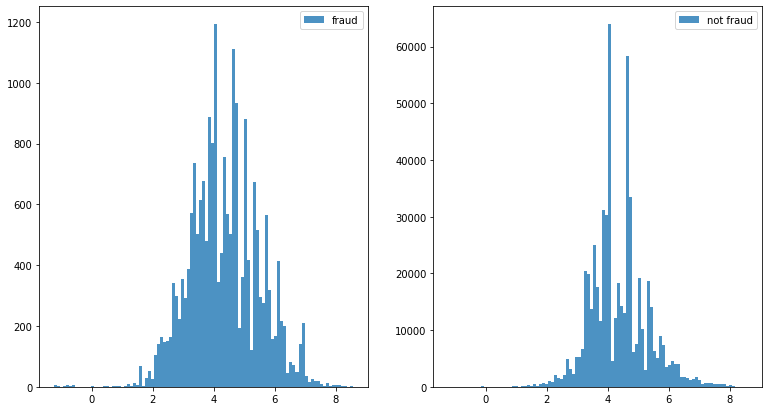

In [11]:
#Transaction Amount plot
x = np.log(df_fraud['TransactionAmt'])
y = np.log(df_not_fraud['TransactionAmt'])

bins = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.hist(x, bins, alpha=0.8, label='fraud')
plt.legend(loc='upper right')
plt.subplot(1, 3, 2)
plt.hist(y, bins, alpha=0.8, label='not fraud')
plt.legend(loc='upper right')
plt.show()

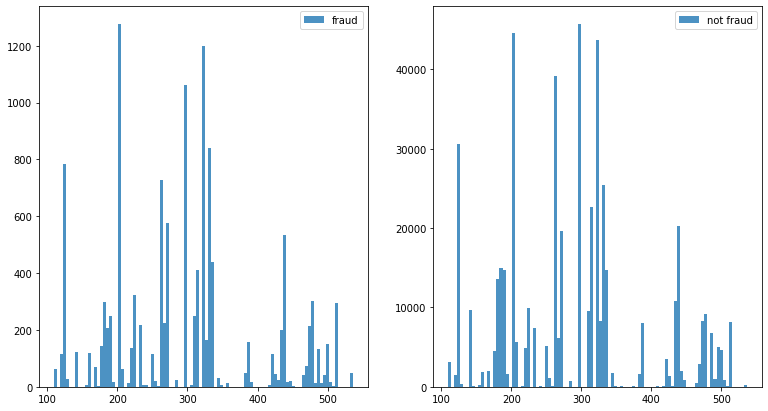

In [9]:
#Addr1 plot
x = df_fraud['addr1']
y = df_not_fraud['addr1']

bins = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.hist(x, bins, alpha=0.8, label='fraud')
plt.legend(loc='upper right')
plt.subplot(1, 3, 2)
plt.hist(y, bins, alpha=0.8, label='not fraud')
plt.legend(loc='upper right')
plt.show()

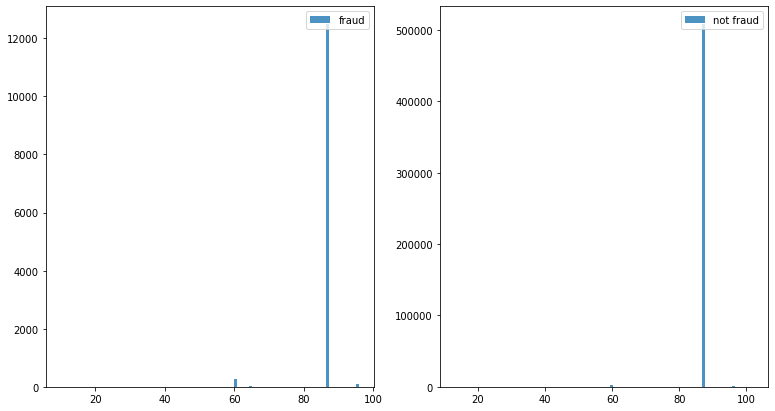

In [80]:
#Addr2 plot
x = df_fraud['addr2']
y = df_not_fraud['addr2']
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
#bins = np.linspace(np.min(x), np.max(x), 10000)
plt.hist(x, bins=100, alpha=0.8, label='fraud')
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.hist(y, bins=100, alpha=0.8, label='not fraud')
plt.legend(loc='upper right')
plt.show()

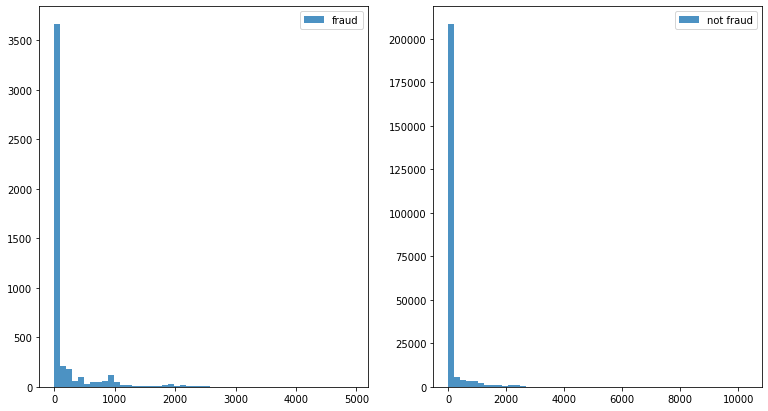

In [79]:
#dist1 plot
x = df_fraud['dist1']
y = df_not_fraud['dist1']
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
#bins = np.linspace(np.min(x), np.max(x), 10000)
plt.hist(x, bins=50, alpha=0.8, label='fraud')
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.hist(y, bins=50, alpha=0.8, label='not fraud')
plt.legend(loc='upper right')
plt.show()

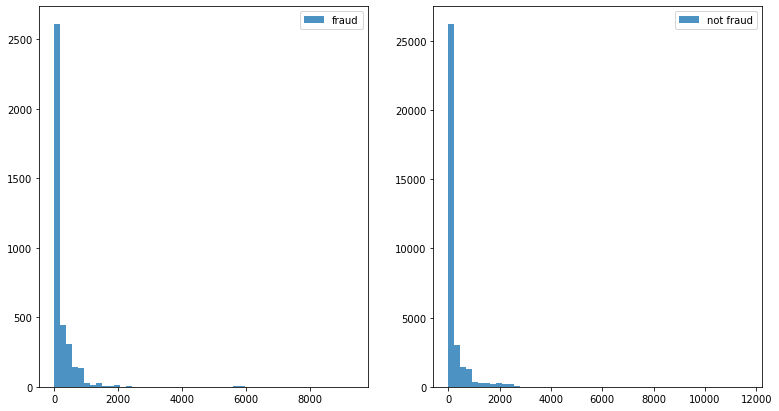

In [67]:
#dist2 plot
x = df_fraud['dist2']
y = df_not_fraud['dist2']
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
#bins = np.linspace(np.min(x), np.max(x), 10000)
plt.hist(x, bins=50, alpha=0.8, label='fraud')
plt.legend(loc='upper right')

plt.subplot(1, 3, 2)
plt.hist(y, bins=50, alpha=0.8, label='not fraud')
plt.legend(loc='upper right')
plt.show()

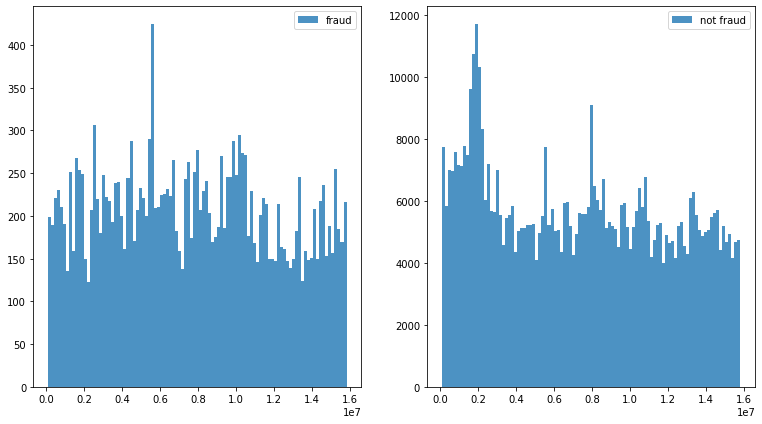

In [13]:
#TransactionDT plot
x = df_fraud['TransactionDT']
y = df_not_fraud['TransactionDT']

bins = np.linspace(np.min(x), np.max(x), 100)
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.hist(x, bins, alpha=0.8, label='fraud')
plt.legend(loc='upper right')
plt.subplot(1, 3, 2)
plt.hist(y, bins, alpha=0.8, label='not fraud')
plt.legend(loc='upper right')
plt.show()

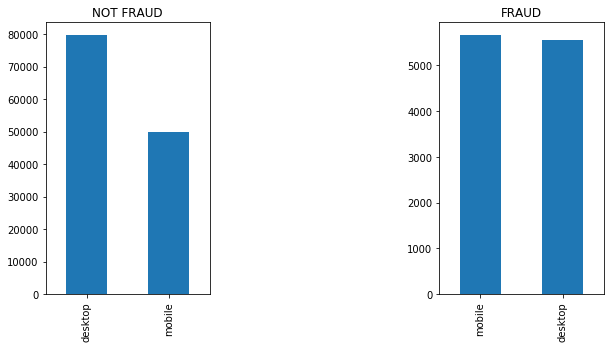

In [14]:
#DeviceType plot
plt.subplot(1, 3, 1)
df_not_fraud['DeviceType'].value_counts().plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['DeviceType'].value_counts().plot(kind='bar',title="FRAUD",figsize=(10,5))

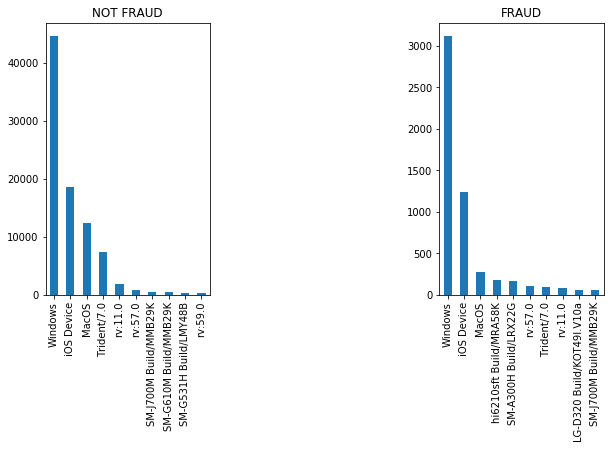

In [15]:
#DeviceInfo plot
plt.subplot(1, 3, 1)
df_not_fraud['DeviceInfo'].value_counts().nlargest(10).plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['DeviceInfo'].value_counts().nlargest(10).plot(kind='bar',title="FRAUD",figsize=(10,5))

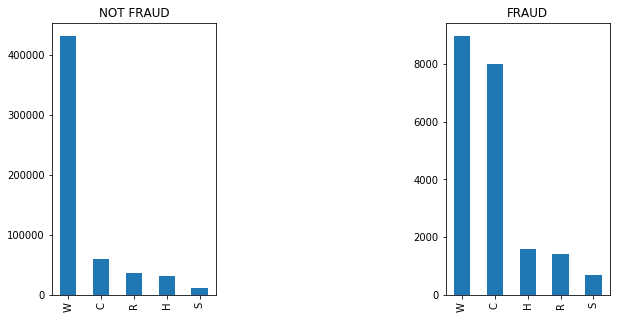

In [16]:
#ProductCD plot
plt.subplot(1, 3, 1)
df_not_fraud['ProductCD'].value_counts().plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['ProductCD'].value_counts().plot(kind='bar',title="FRAUD",figsize=(10,5))

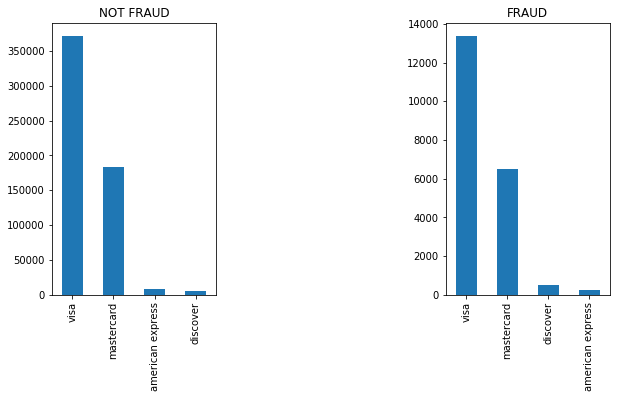

In [17]:
#card4 plot
plt.subplot(1, 3, 1)
df_not_fraud['card4'].value_counts().plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['card4'].value_counts().plot(kind='bar',title="FRAUD",figsize=(10,5))

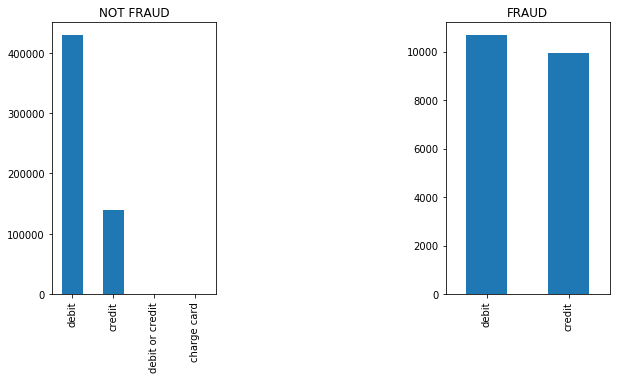

In [18]:
#card6 plot
plt.subplot(1, 3, 1)
df_not_fraud['card6'].value_counts().plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['card6'].value_counts().plot(kind='bar',title="FRAUD",figsize=(10,5))

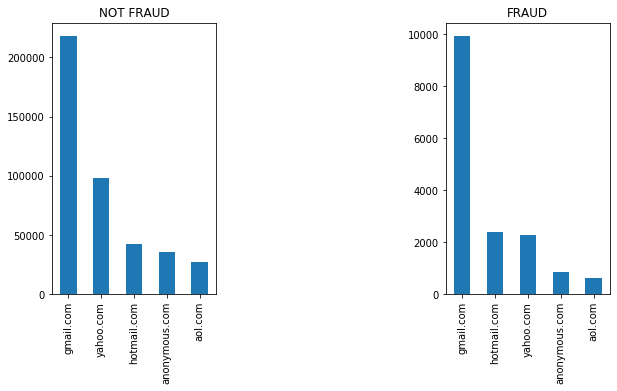

In [19]:
#P_emaildomain plot
plt.subplot(1, 3, 1)
df_not_fraud['P_emaildomain'].value_counts().nlargest(5).plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['P_emaildomain'].value_counts().nlargest(5).plot(kind='bar',title="FRAUD",figsize=(10,5))

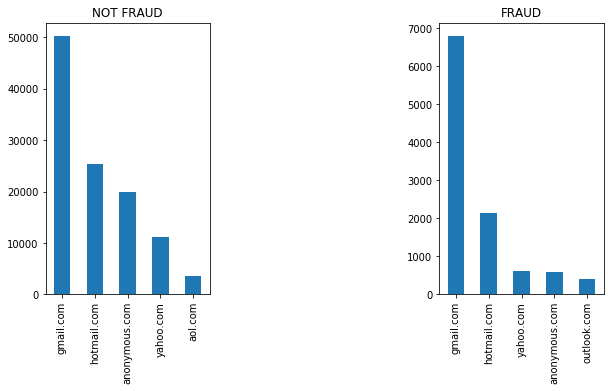

In [20]:
#R_emaildomain plot
plt.subplot(1, 3, 1)
df_not_fraud['R_emaildomain'].value_counts().nlargest(5).plot(kind='bar',title="NOT FRAUD",figsize=(10,5))
plt.subplot(1, 3, 3)
df_fraud['R_emaildomain'].value_counts().nlargest(5).plot(kind='bar',title="FRAUD",figsize=(10,5))

1. TransactionAmt - Fraud data's tail is a bit more wide in the distribution, apart from that no significant difference.
2. dist 1 - Near the 60 mark, fraud items have a good number indicating that's a spot that should be investigated more
3. dist 2- nno significant difference
4. TransactionDT - It is slightly skewed for non fraud indicating that the day when the data was collected or analysed, transaction were more non fraud during initial time.(maybe there was a bug which was exposed!!, just a guess)
5. DeviceType - Fraud transactions are more made through mobile than desktop
6. DeviceInfo- No significant difference
7. ProductCD- W is the most common Product for transactions, and C seems to be used most in fraud transactions(in terms of ratio to the non fraud). Though frequency for W and C is high for fraud.
8. card4 - no significant difference
9. card6 - credit fraud are more than non fraud 
10. P_emaildomain - no significant difference
11. R_emaildomain - no significant difference

## Part 2 - Transaction Frequency

In [21]:
# TODO: code to generate the frequency graph
most_frequent_country_code_fraud=df['addr2'].value_counts().nlargest(1)
most_frequent_country_code_fraud

87.0    520481
Name: addr2, dtype: int64

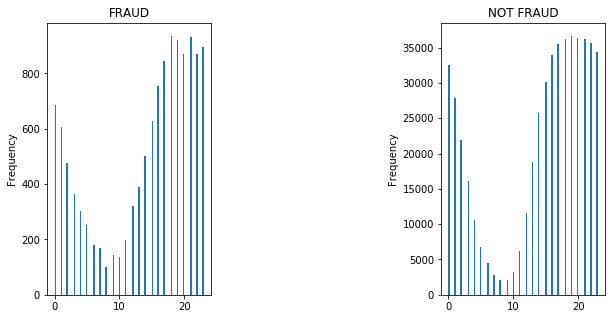

In [22]:
plt.subplot(1, 3, 1)
df_most_frequent_country_code_fraud_time=df_fraud[df_fraud['addr2']==87.0]
(df_most_frequent_country_code_fraud_time['hours'].astype('int')).plot.hist(bins=100,title="FRAUD",figsize=(10,5))

plt.subplot(1, 3, 3)
df_most_frequent_country_code_fraud_time=df_not_fraud[df_not_fraud['addr2']==87.0]
(df_most_frequent_country_code_fraud_time['hours'].astype('int')).plot.hist(bins=100,title="NOT FRAUD",figsize=(10,5))

1. 87.0 is the most frequent country code
2. There is a downward slope from 0 to 10 suggesting that most of the people starts to go to sleep at around 0 and then resumes there tranactions from 10 o'clock onwards. It looks like a typical retailer transactions which is periodic in nature.

## Part 3 - Product Code

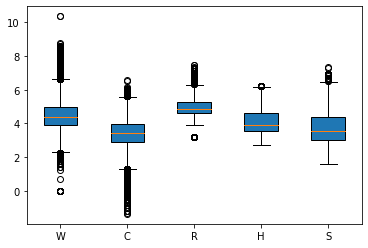

In [23]:
# TODO: code to analyze prices for different product codes
df_p3=df[['ProductCD','TransactionAmt']]
df['ProductCD'].value_counts()

#Part 3
box_plot_data=[np.log(df_p3.loc[df_p3['ProductCD']=='W','TransactionAmt']),np.log(df_p3.loc[df_p3['ProductCD']=='C','TransactionAmt']),np.log(df_p3.loc[df_p3['ProductCD']=='R','TransactionAmt']),np.log(df_p3.loc[df_p3['ProductCD']=='H','TransactionAmt']),np.log(df_p3.loc[df_p3['ProductCD']=='S','TransactionAmt'])]
plt.boxplot(box_plot_data,patch_artist=True,labels=['W','C','R','H','S'])
plt.show()
#df_p3.loc[df_p3['ProductCD']=='W','TransactionAmt'].head(1)

1. W is the costliest product 
2. C is the cheapest product


The above box plot gives an idea of the inter quartiles ranges and shows that W has products which are greater than 75% of its products and C has a lot of products which are near minimum. Both of these products suggests outliers or skewedness.  

## Part 4 - Correlation Coefficient

Coefficient for fraud transactions:
[[1.         0.05534275]
 [0.05534275 1.        ]]
Coefficient for non-fraud transactions:
[[1.         0.04430689]
 [0.04430689 1.        ]]
Another way to calculate coefficient:
0.6421174943084446


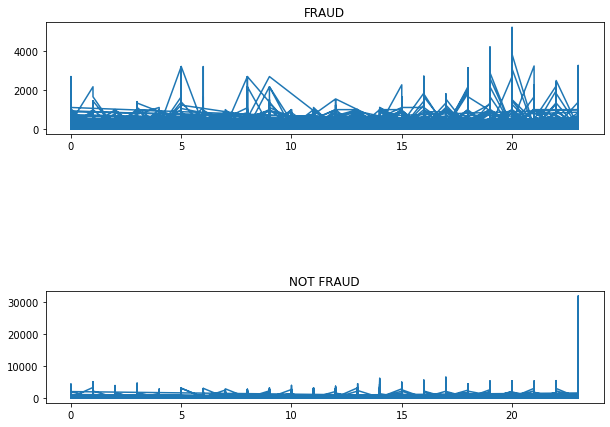

In [83]:
#code to calculate correlation coefficient
plt.figure(figsize=(10,7))
plt.subplot(3, 1, 1)
plt.plot(df_fraud['hours'].astype('int'), df_fraud['TransactionAmt'])
plt.title('FRAUD')

plt.subplot(3, 1, 3)
plt.plot(df_not_fraud['hours'].astype('int'), df_not_fraud['TransactionAmt'])
plt.title('NOT FRAUD')

print ("Coefficient for fraud transactions:")
print (np.corrcoef(df_fraud['hours'].astype('int'),df_fraud['TransactionAmt']))
print ("Coefficient for non-fraud transactions:")
print (np.corrcoef(df_not_fraud['hours'].astype('int'),df_not_fraud['TransactionAmt']))


coeff = df_train.groupby(['hours'], as_index=False)['TransactionAmt'].sum()
print("Another way to calculate coefficient:")
print(coeff['hours'].corr(coeff['TransactionAmt']))

Approach 1:
Coefficient for fraud transactions:
0.05534275 ,  Coefficient for non-fraud transactions:
0.04430689

Approach 2: (grouping hours and summing them up)
Another way to calculate coefficient:
0.6421174943084446



## Part 5 - Interesting Plot

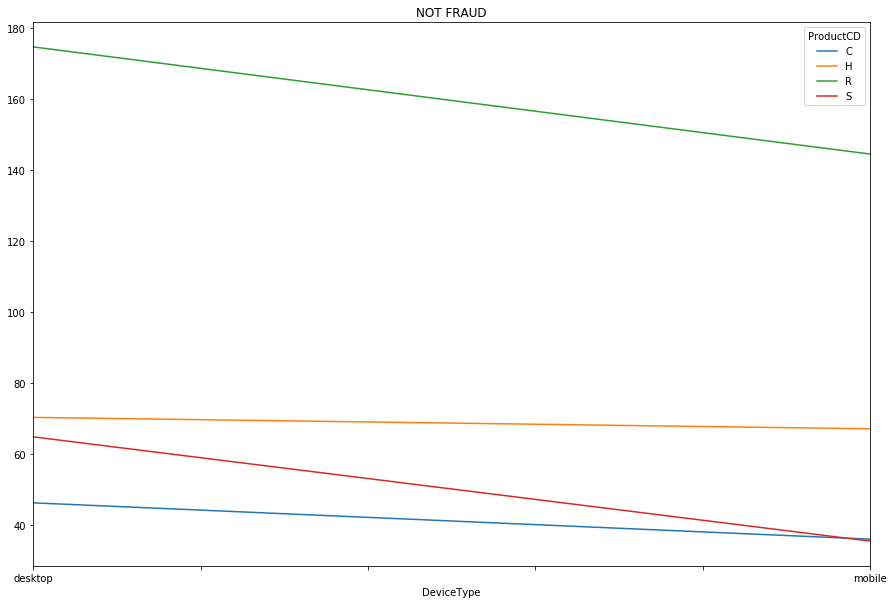

In [28]:
# TODO: code to generate the plot here.
fig, ax = plt.subplots(figsize=(15,10))
df_not_fraud.groupby(['DeviceType','ProductCD']).mean()['TransactionAmt'].unstack().plot(ax=ax,title="NOT FRAUD")

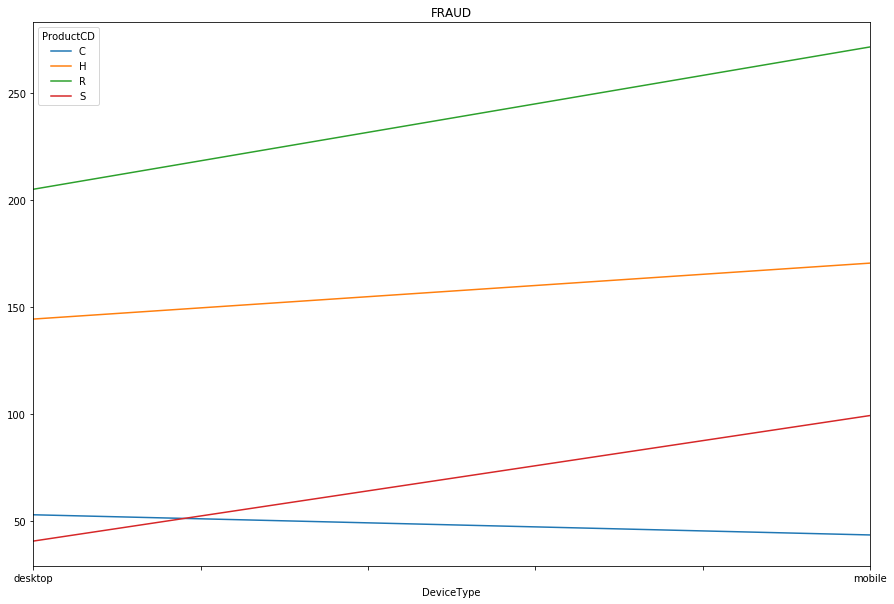

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
df_fraud.groupby(['DeviceType','ProductCD']).mean()['TransactionAmt'].unstack().plot(ax=ax,title="FRAUD")

For Non Fraud Transactions:
1. Mobile has lower mean of transaction amount for all the product codes.(R and S product codes show a steep drop)
2. Mobile has significantly high mean for fraud tranactions for all product codes except C(which is almost the same).


The above two points suggests that fraud transactions happens more on mobiles and the transaction amount depends on how costly the product is. Also, C which was the cheapest product code has the highest mean for fraud and non fraud transactions suggesting that either common man does a lot of transactions or people use their cheaper phones to transact or that phone is very popular and most of the poeple owns it.

## Part 6 - Prediction Model

In [31]:
# TODO: code for your final model
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\pulki\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,TransactionID,isFraud,TransactionDT,TransactionAmt,addr1,addr2,dist1,dist2
TransactionID,1,0.0142,0.998,0.012,-0.00037,0.0572,-0.027,-0.0263
isFraud,0.0142,1,0.0131,0.0113,0.0056,-0.0304,0.0215,-0.0191
TransactionDT,0.998,0.0131,1,0.0119,-5.1e-05,0.052,-0.0273,-0.0269
TransactionAmt,0.012,0.0113,0.0119,1,-0.00742,0.0283,0.0261,0.0231
addr1,-0.00037,0.0056,-5.1e-05,-0.00742,1,-0.00277,-0.00121,0.00469
addr2,0.0572,-0.0304,0.052,0.0283,-0.00277,1,-0.0387,0.0102
dist1,-0.027,0.0215,-0.0273,0.0261,-0.00121,-0.0387,1,nan
dist2,-0.0263,-0.0191,-0.0269,0.0231,0.00469,0.0102,nan,1


In [32]:
#Cleaning the data
print(df_train.shape)
df_train.isnull().sum()


(590540, 438)


TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
id_15             449555
id_16             461200
id_17             451171
id_18             545427
id_19             451222
id_20             451279
id_21             585381
id_22             585371
id_23             585371


In [33]:
#dropping columns where null count is a certain threshold, in this case only 10% null values are allowed
df_train=df_train.drop_duplicates(['TransactionID']).dropna(thresh=df_train.shape[0]*0.90,axis=1)
df_train.isnull().sum()

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             8933
card3             1565
card4             1577
card5             4259
card6             1571
C1                   0
C2                   0
C3                   0
C4                   0
C5                   0
C6                   0
C7                   0
C8                   0
C9                   0
C10                  0
C11                  0
C12                  0
C13                  0
C14                  0
D1                1269
V95                314
V96                314
V97                314
V98                314
                  ... 
V296              1269
V297                12
V298                12
V299                12
V300              1269
V301              1269
V302                12
V303                12
V304                12
V305                12
V306                12
V307                12
V308       

In [34]:
#Removing highly correlated columns

corr_matrix = df_train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
df_train=df_train.drop(df_train[to_drop], axis=1)

df_train.isnull().sum()

TransactionID        0
isFraud              0
TransactionAmt       0
ProductCD            0
card1                0
card2             8933
card3             1565
card4             1577
card5             4259
card6             1571
C1                   0
C3                   0
C5                   0
C13                  0
D1                1269
V95                314
V98                314
V99                314
V100               314
V104               314
V107               314
V108               314
V109               314
V110               314
V111               314
V112               314
V114               314
V115               314
V116               314
V117               314
                  ... 
V130               314
V131               314
V135               314
V136               314
V281              1269
V282              1269
V283              1269
V284                12
V285                12
V286                12
V287                12
V288              1269
V289       

In [35]:
#df=df_train.dropna()
df=df_train
df=df.drop(['date'],axis=1)
df.shape

(590540, 68)

In [36]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#one hot encoding for train
df=pd.get_dummies(df)

#replacing null with median
for col in df.columns:
    median = df[col].median()
    df[col].fillna(median, inplace = True)


df_test=df_test.drop(['date','TransactionID','TransactionDT'],axis=1)
df_test[df_test.select_dtypes(['object']).columns] = df_test.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#one hot encoding for test
df_test=pd.get_dummies(df_test)

In [37]:
#Removing rows with low variance 
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(df)
len(df.columns[constant_filter.get_support()])
qconstant_columns = [column for column in df.columns
                    if column in df.columns[constant_filter.get_support()]]

#Standardizing the data
df1 = constant_filter.transform(df)
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)


df1=pd.DataFrame(df1)
df1.columns=qconstant_columns
df1=df1.drop(['TransactionID','isFraud'],axis=1)
isFraud=df['isFraud']
isFraud.head(5)
df1 = df.set_index(df.index)


print(df1.shape)
print(df_test.shape)


(590540, 137)
(506691, 3478)


In [38]:
#Selecting the common columsn as One hot encoding generally gives differnt columns
common_cols = df_test.columns.intersection(df1.columns)
df_test=df_test[common_cols]
print(common_cols)

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C3', 'C5',
       'C13', 'D1',
       ...
       'days_22', 'days_23', 'days_24', 'days_25', 'days_26', 'days_27',
       'days_28', 'days_29', 'days_30', 'days_31'],
      dtype='object', length=134)


In [39]:
#Same with test data
#replacing null with median
for col in df_test.columns:
    median = df_test[col].median()
    df_test[col].fillna(median, inplace = True)
df_test=scaler.fit_transform(df_test)
df_test=pd.DataFrame(df_test)
df_test.columns=common_cols

In [40]:
print(common_cols.shape)

#splitting the data into train and validation set
train_features, val_features, train_labels, val_labels = train_test_split(
    df1[common_cols],
    df1['isFraud'],
    test_size=0.1)

(134,)


In [41]:
#Logistic regression model
logreg = LogisticRegression(class_weight='balanced')
log_model = logreg.fit(train_features, train_labels)

C:\Users\pulki\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pulki\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
y_pred = log_model.predict(val_features)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_model.score(val_features, val_labels)))
print(classification_report(val_labels, y_pred))
#Achieved a score of 0.756 on kaggle, let's try XGBoost Model now!

Accuracy of logistic regression classifier on test set: 0.63
              precision    recall  f1-score   support

           0       0.98      0.63      0.76     56943
           1       0.06      0.67      0.11      2111

    accuracy                           0.63     59054
   macro avg       0.52      0.65      0.44     59054
weighted avg       0.95      0.63      0.74     59054



In [43]:
#Building XGBoost model

xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.2, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 20,scale_pos_weight=20)
xg_reg.fit(train_features,train_labels)


C:\Users\pulki\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=20,
             n_jobs=1, nthread=None, objective='binary:logistic',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=20,
             seed=None, silent=None, subsample=1, verbosity=1)

In [44]:
preds = xg_reg.predict(val_features)

In [45]:
preds=np.where(preds>0.6,1,0)
print(classification_report(val_labels, preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56943
           1       0.27      0.53      0.36      2111

    accuracy                           0.93     59054
   macro avg       0.63      0.74      0.66     59054
weighted avg       0.96      0.93      0.94     59054



In [46]:
#Trying Light GBM
train_data=lgb.Dataset(train_features,label=train_labels)
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']
#training our model using light gbm
num_round=50
lgbm=lgb.train(param,train_data,num_round)

In [47]:
ypred=lgbm.predict(val_features)

In [48]:
ypred=np.where(ypred>0.5,1,0)
print(classification_report(val_labels, ypred))
#Scored 0.80 on kaggle

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56943
           1       0.88      0.29      0.44      2111

    accuracy                           0.97     59054
   macro avg       0.93      0.64      0.71     59054
weighted avg       0.97      0.97      0.97     59054



In [50]:
preds = xg_reg.predict(df_test)
finaldf=pd.DataFrame()

#Taking XGBoost as it performed the best
finaldf['TransactionID']=df3['TransactionID']
finaldf['isFraud']=preds
#scored 0.86 on kaggle

In [51]:
finaldf.to_csv(r'C:\\MS Stony Brook\\Sem2\\Data Science Fundamentals\\ieee-fraud-detection\\prediction.csv',index=False)

1. Accuracy of the models are shown above for logistic regression, XGBoost and Light GBM implementation.
2. Accuracy is not a good measure of the performance as the data set is highly imbalanced.

General appriach taken for building the above models:
1. Dropping columns which have more than some threshold(say 20%) of null values
2. Dropping columns which have which correaltion with each other(problem of multi-colinearity may arise).
3. Dropping columns which have negligble variance(meaning data is almost constant)
4. Imputing null values with mean
5. Scaling the data.
6. Doing one Hot Encoding

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/pulkitkalia/account

Highest Rank: 5161

Score: 0.8506

Number of entries: 15

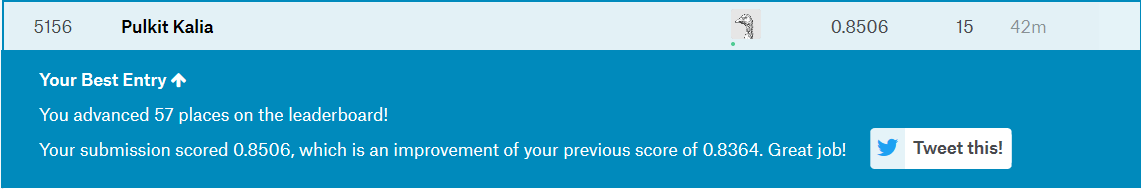

In [56]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = "C:\\Users\\pulki\\OneDrive\\Desktop\\"
Image(filename = PATH + "Capture.PNG", width=1000, height=500)